In [1]:
# Importing all required librarires

from pathlib import Path

import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from dmba import plotDecisionTree, classificationSummary, regressionSummary

%matplotlib inline   
import matplotlib.pylab as plt

no display found. Using non-interactive Agg backend


# 1. Upload, explore, clean, and preprocess data for classification tree.

#### A. Create a flight_df data frame by uploading the original data set into Python. Determine and present in this report the data frame dimensions, i.e., number of rows and columns.

In [2]:
flight_df = pd.read_csv("FlightDelays.csv")

print("Number of Rows ",flight_df.shape[0])
print("Number of Columns: ",flight_df.shape[1],"\n"*2)
print("First 5 records of Data are: ")
flight_df.head()

Number of Rows  2201
Number of Columns:  11 


First 5 records of Data are: 


,SCH_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_NUM,ORIGIN,WEATHER,WK_DAY,MTH_DAY,FL_STATUS
0,1455,OH,1455,JFK,184,5935,BWI,0,4,1,ontime
1,1640,DH,1640,JFK,213,6155,DCA,0,4,1,ontime
2,1245,DH,1245,LGA,229,7208,IAD,0,4,1,ontime
3,1715,DH,1709,LGA,229,7215,IAD,0,4,1,ontime
4,1039,DH,1035,LGA,229,7792,IAD,0,4,1,ontime


#### B. Remove ‘DEST’ and ‘ORIGIN’ variables from the flight_df data frame. Then, display thecolumn data types in flight_df, provide and briefly explain them in your report.

In [3]:
#Removing two columns from the dataset
flight_df = flight_df.drop(columns=["DEST","ORIGIN"])
print("Updated Number of Columns: ",flight_df.shape[1],"\n"*2)


#Coumns Data Types
print("Data Type of each column: ")
flight_df.dtypes

Updated Number of Columns:  9 


Data Type of each column: 


SCH_TIME      int64
CARRIER      object
DEP_TIME      int64
DISTANCE      int64
FL_NUM        int64
WEATHER       int64
WK_DAY        int64
MTH_DAY       int64
FL_STATUS    object
dtype: object

#### ### C. You leave the outcome variable ‘FL_STATUS’ unchanged in flight_df. However, for the ‘CARRIER’ predictor variable, you need to convert it into binary variables. For that, change the ‘CARRIER’ data type from ‘object’ to ‘category’, and then convert this categorical variable into dummy variables. Display in Python the modified column data types and provide them in your report.

In [4]:
# We can see in Previus result that Column "CARRIER" and column "FL_STATUS" have object data type
# we will leave the FL_STATUS as it is because its our target column, and we covert "CARRIER" into dummy variables
flight_df.CARRIER = flight_df.CARRIER.astype('category')


# Display category levels (attributes) and category type FOR CARRIER
print("")
print('Category levels and changed variable type of CARRIER:')
print(flight_df.CARRIER.cat.categories) 
print(flight_df.CARRIER.dtype)


Category levels and changed variable type of CARRIER:
Index(['CO', 'DH', 'DL', 'MQ', 'OH', 'RU', 'UA', 'US'], dtype='object')
category


In [5]:
# converting Categories column into Dummy variables
flight_df = pd.get_dummies(flight_df,columns=["CARRIER"], prefix_sep='_', drop_first=True)
print("Updated Columns in dataset are: ")
print(flight_df.columns)

Updated Columns in dataset are: 
Index(['SCH_TIME', 'DEP_TIME', 'DISTANCE', 'FL_NUM', 'WEATHER', 'WK_DAY',
       'MTH_DAY', 'FL_STATUS', 'CARRIER_DH', 'CARRIER_DL', 'CARRIER_MQ',
       'CARRIER_OH', 'CARRIER_RU', 'CARRIER_UA', 'CARRIER_US'],
      dtype='object')


### D. Display in Python and provide in your report the first 10 records of the modified flight_df data frame. Briefly explain the outcome and predictors in this case.

In [6]:
print("First 10 records of Data are: ")
flight_df.head(10)

First 10 records of Data are: 


,SCH_TIME,DEP_TIME,DISTANCE,FL_NUM,WEATHER,WK_DAY,MTH_DAY,FL_STATUS,CARRIER_DH,CARRIER_DL,CARRIER_MQ,CARRIER_OH,CARRIER_RU,CARRIER_UA,CARRIER_US
0,1455,1455,184,5935,0,4,1,ontime,0,0,0,1,0,0,0
1,1640,1640,213,6155,0,4,1,ontime,1,0,0,0,0,0,0
2,1245,1245,229,7208,0,4,1,ontime,1,0,0,0,0,0,0
3,1715,1709,229,7215,0,4,1,ontime,1,0,0,0,0,0,0
4,1039,1035,229,7792,0,4,1,ontime,1,0,0,0,0,0,0
5,840,839,228,7800,0,4,1,ontime,1,0,0,0,0,0,0
6,1240,1243,228,7806,0,4,1,ontime,1,0,0,0,0,0,0
7,1645,1644,228,7810,0,4,1,ontime,1,0,0,0,0,0,0
8,1715,1710,228,7812,0,4,1,ontime,1,0,0,0,0,0,0
9,2120,2129,228,7814,0,4,1,ontime,1,0,0,0,0,0,0


In [7]:
# Identifying predictors(col names) and outcome(target Name) of the regression model]
predictors = ['SCH_TIME', 'DEP_TIME', 'DISTANCE', 'FL_NUM', 'WEATHER', 'WK_DAY',
       'MTH_DAY', 'CARRIER_DH', 'CARRIER_DL', 'CARRIER_MQ',
       'CARRIER_OH', 'CARRIER_RU', 'CARRIER_UA', 'CARRIER_US']

outcome = "FL_STATUS"

______________________________________________________________________________________________________________

# 2. Develop a classification tree for the Flight Delays case.

#### A. Develop in Python the predictor variables (14 variables) and outcome variable (‘FL_STATUS’), partition the data set (60% for training and 40% for validation partitions). Train a classification tree model using DecisionTreeClassifier() with the training data set and the following tree control parameters: (a) maximum depth (number of splits) equals 5; (b) minimum impurity decrease per split of 0.001; and (c) minimum number of node records (samples) to split equals to 10. Use plotDecisionTree() with the feature_names and class_names parameters to display the classification tree in Python and present it in your report.

In [8]:
# Identifying X and y variables to partition the data
# using 60% of records for training and 40% for validation (test_size=0.4). 
X = flight_df[predictors]
Y = flight_df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, Y, test_size=0.4, random_state=1)

 Classes: delayed, ontime
 Classification Tree with Control Parameters


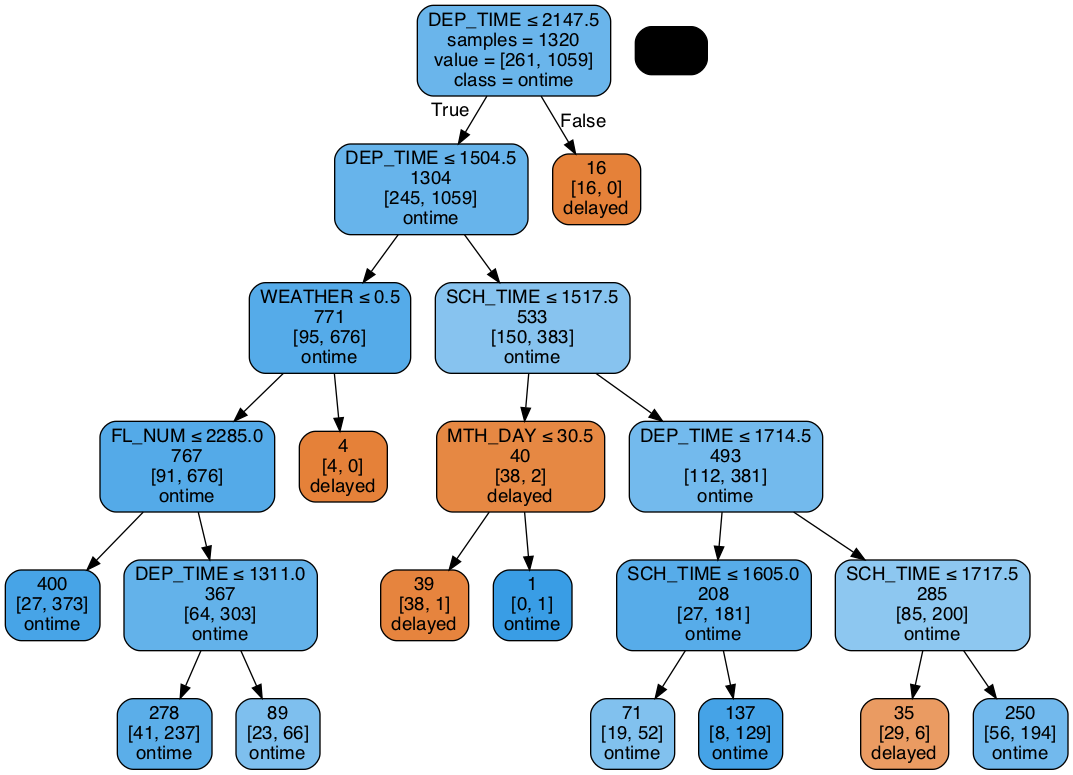

In [9]:
#Making a Decicison Tree Model
classTree = DecisionTreeClassifier(max_depth=5, min_impurity_decrease=0.001, min_samples_split=10)
classTree.fit(train_X, train_y)

# Display classes used in the classification tree: 'ontime' and 'delayed'. 
print(" Classes: {}".format(', '.join(classTree.classes_)))

# Display classification tree for training partition.
print(' Classification Tree with Control Parameters')
plotDecisionTree(classTree, feature_names=train_X.columns,class_names=classTree.classes_)

#### B. Identify and display in Python confusion matrices for training and validation partitions. Present them in your report and comment on accuracy (misclassification) rate for both partitions and explain if there is a possibility of overfitting.

In [10]:
# Identify  and display confusion matrix for training partition. 
print('Training Partition')
classificationSummary(train_y, classTree.predict(train_X))

# Identify  and display confusion matrix for validation partition. 
print()
print('Validation Partition')
classificationSummary(valid_y, classTree.predict(valid_X))

Training Partition
Confusion Matrix (Accuracy 0.8629)

       Prediction
Actual    0    1
     0   87  174
     1    7 1052

Validation Partition
Confusion Matrix (Accuracy 0.8558)

       Prediction
Actual   0   1
     0  54 113
     1  14 700


#### C. Using the trained classification tree, make classification of flight status (‘delayed’ or ‘ontime’) for the following two new flight records:

In [11]:
# Develop a dataframe with 2 new records for all 14 predictors
new_df_records = pd.DataFrame({
 'SCH_TIME':[1230,2050], 
 'DEP_TIME':[1240,2105], 
 'DISTANCE':[214,199], 
 'FL_NUM':[808,4976], 
 'WEATHER':[1,0], 
 'WK_DAY':[4,5],
 'MTH_DAY':[20,30],
 'CARRIER_DH':[0,0], 
 'CARRIER_DL':[0,1], 
 'CARRIER_MQ':[0,0], 
 'CARRIER_OH':[0,0], 
 'CARRIER_RU':[0,0],
 'CARRIER_UA':[1,0], 
 'CARRIER_US':[0,0]
})
new_df_records.head()

,SCH_TIME,DEP_TIME,DISTANCE,FL_NUM,WEATHER,WK_DAY,MTH_DAY,CARRIER_DH,CARRIER_DL,CARRIER_MQ,CARRIER_OH,CARRIER_RU,CARRIER_UA,CARRIER_US
0,1230,1240,214,808,1,4,20,0,0,0,0,0,1,0
1,2050,2105,199,4976,0,5,30,0,1,0,0,0,0,0


In [12]:
# Make classifications for new data. 
pred_tree = classTree.predict(new_df_records)

#Display new data and display "FL_STATUS" prediction 
pred_result = pd.DataFrame({
 'SCH_TIME':[1230,2050], 
 'DEP_TIME':[1240,2105], 
 'DISTANCE':[214,199], 
 'FL_NUM':[808,4976], 
 'WEATHER':[1,0], 
 'WK_DAY':[4,5],
 'MTH_DAY':[20,30],
 'CARRIER_DH':[0,0], 
 'CARRIER_DL':[0,1], 
 'CARRIER_MQ':[0,0], 
 'CARRIER_OH':[0,0], 
 'CARRIER_RU':[0,0],
 'CARRIER_UA':[1,0], 
 'CARRIER_US':[0,0],
 'Predicted FL_Status': pred_tree
})

print()
print('Classifications for Flight Status')
print(pred_result)


Classifications for Flight Status
   SCH_TIME  DEP_TIME  DISTANCE  FL_NUM  WEATHER  WK_DAY  MTH_DAY  CARRIER_DH  \
0      1230      1240       214     808        1       4       20           0   
1      2050      2105       199    4976        0       5       30           0   

   CARRIER_DL  CARRIER_MQ  CARRIER_OH  CARRIER_RU  CARRIER_UA  CARRIER_US  \
0           0           0           0           0           1           0   
1           1           0           0           0           0           0   

  Predicted FL_Status  
0             delayed  
1              ontime  


____________________________________________________________________________________________________________________

# 3. Apply grid search and ensemble trees to improve classification results.

#### A. Use the GridSearchCV() algorithm in Python to improve (optimize) the classification tree control parameters. Consider the following control parameters: (a) maximum depth (number of splits) in the range from 2 to 30; (b) minimum impurity decrease per split of 0, 0.0005, and 0.001; and (c) minimum number of node records (samples) to split in the range from 5 to 30. Do not use the initial guess grid search, and directly apply the improved grid search. Provide in your report the improved parameters and display in Python the associated classification tree. Display the confusion matrices for training and validation partitions for the improved classification tree.

In [22]:
param_grid = {
    'max_depth': list(range(2,31)),  
    'min_impurity_decrease': [0, 0.0005, 0.001], 
    'min_samples_split': list(range(5,31)),
}

# Apply GridSearchCV() fucntion for various combinations of
# DecisionTreeClassifier() initial parameters. cv=5 means that
# 5-fold cross-validation is used in this case, and n_jobs=-1 
# means that the availalbe computer memory (CPU) will be 
# used to make calculations faster. 

gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)

# Display best initial paramenters of classification tree. 
print(f'Improved score:{gridSearch.best_score_:.4f}')
print('Improved parameters: ', gridSearch.best_params_)

Improved score:0.8667
Improved parameters:  {'max_depth': 11, 'min_impurity_decrease': 0.001, 'min_samples_split': 18}


 Classes: delayed, ontime


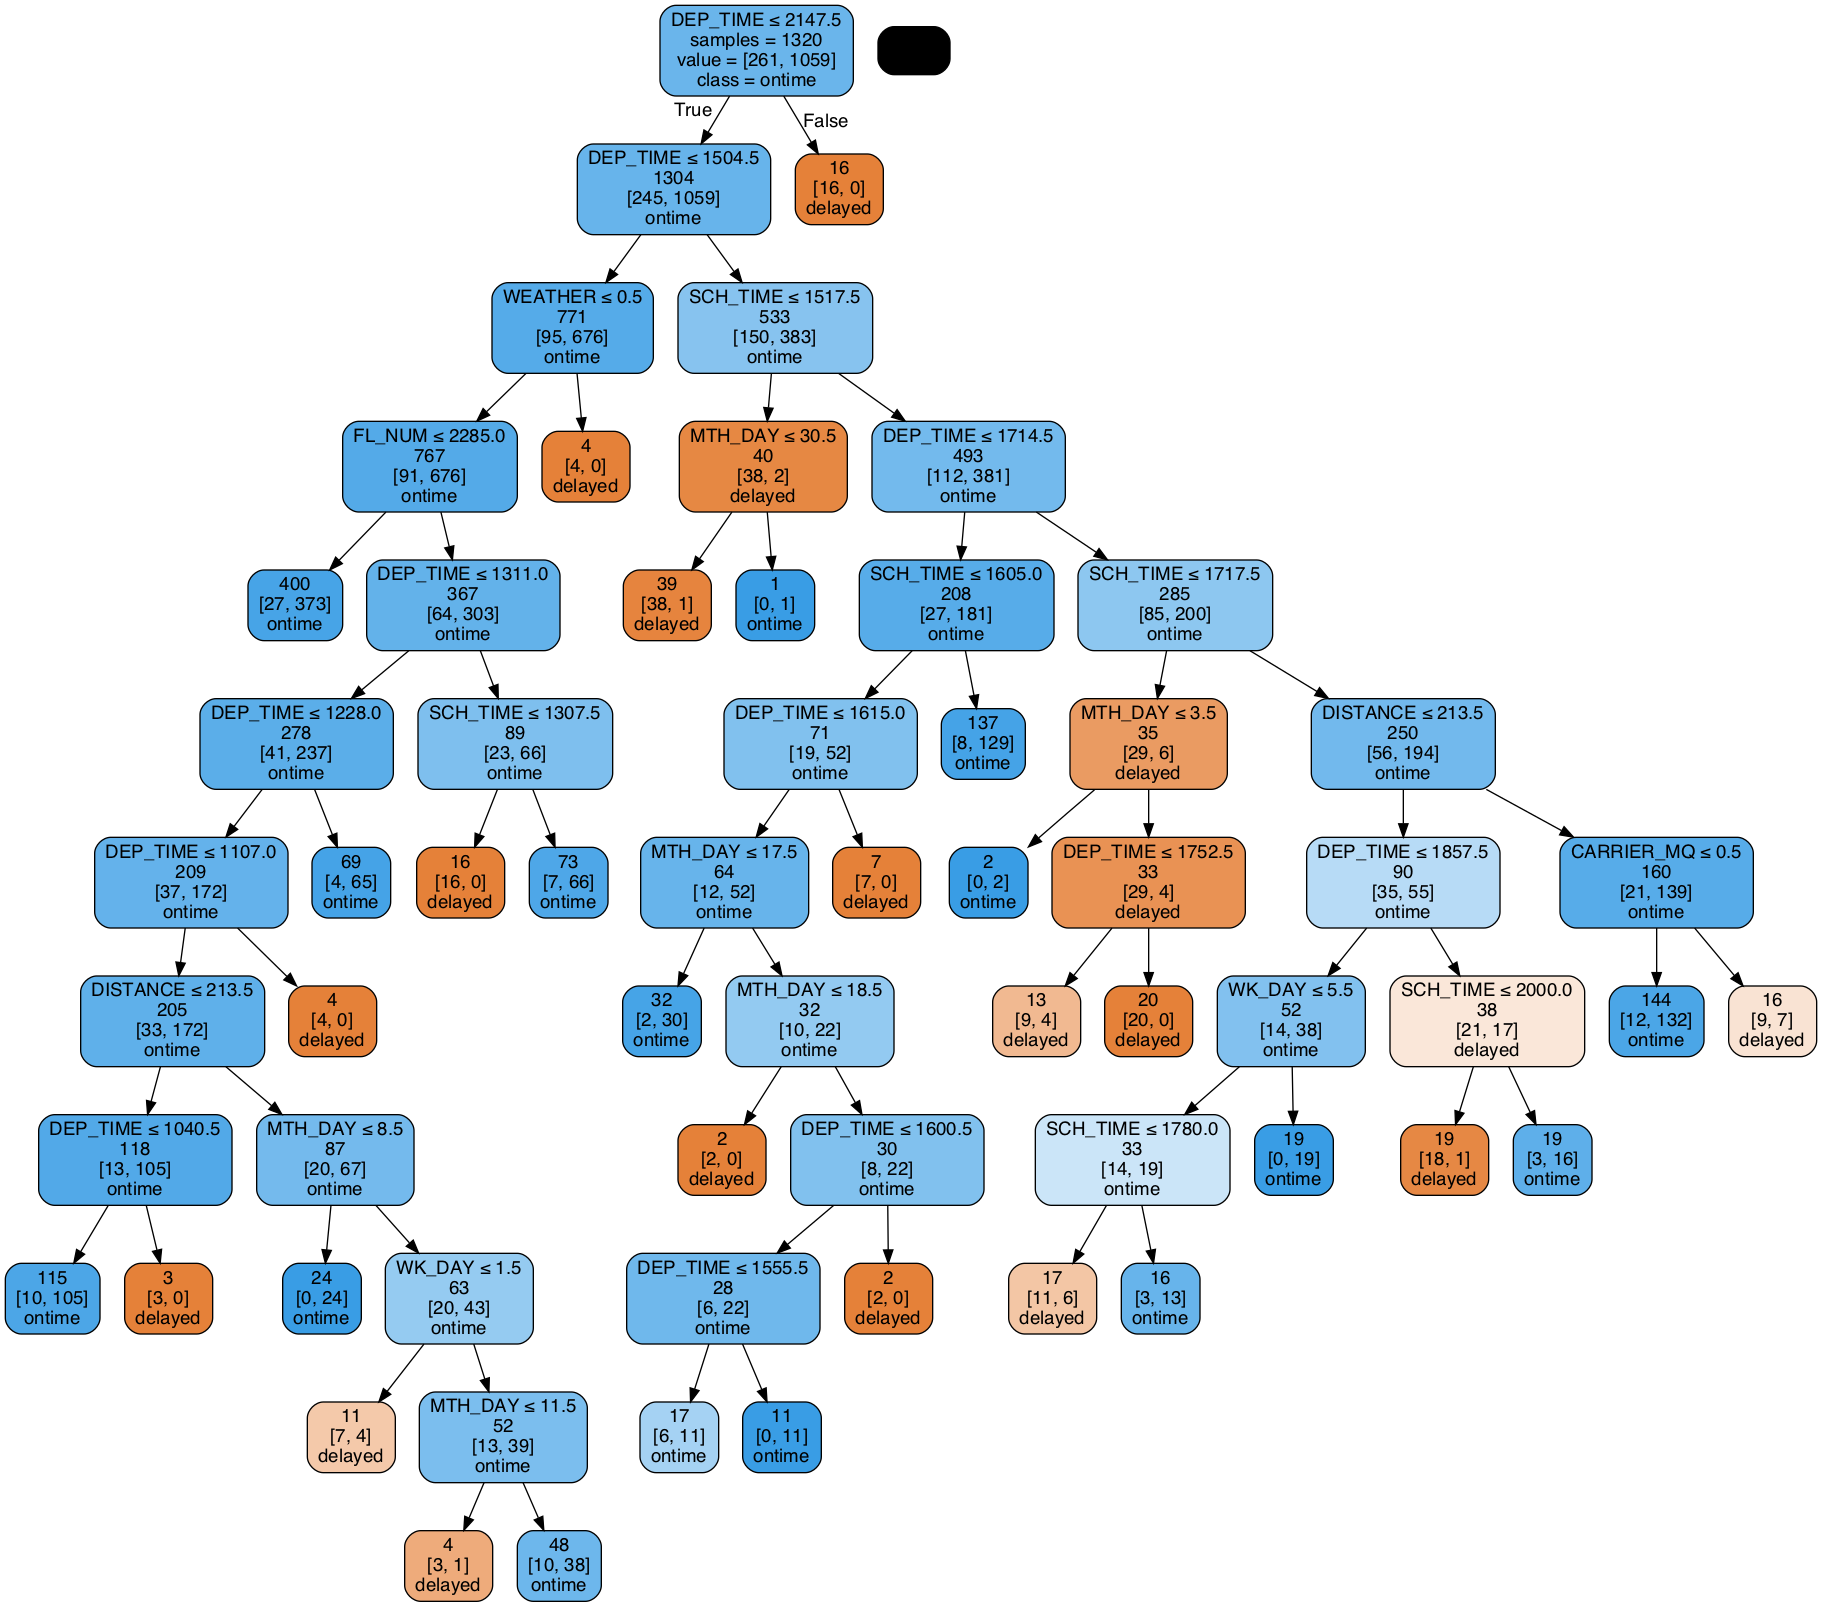

In [23]:
# Display classes used in the classification tree: 'ontime' and 'delayed'. 
print(" Classes: {}".format(', '.join(gridSearch.classes_)))


# Lets make a final Tree with the best estimator
bestClassTree = gridSearch.best_estimator_
plotDecisionTree(bestClassTree, feature_names=train_X.columns, class_names=bestClassTree.classes_)

In [24]:
# Identify  and display confusion matrix for training partition. 
print('Training Partition')
classificationSummary(train_y, bestClassTree.predict(train_X))


# Identify  and display confusion matrix for validation partition. 
print()
print('Validation Partition')
classificationSummary(valid_y, bestClassTree.predict(valid_X))

Training Partition
Confusion Matrix (Accuracy 0.9121)

       Prediction
Actual    0    1
     0  169   92
     1   24 1035

Validation Partition
Confusion Matrix (Accuracy 0.8661)

       Prediction
Actual   0   1
     0  91  76
     1  42 672
